# Extract the Corona Virus Cases in India data from an API

In [1]:
# library for data manipulation
import pandas as pd

# library for advance mathematical operations
import numpy as np

# library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for dealing with json data
import json

# Reading the json data from the file

In [2]:
# load the saved json file
covid_data = json.load(open('covid.json'))

In [3]:
# check the datatype covid_data
type(covid_data)

dict

In [4]:
covid_data

{'success': True,
 'data': {'summary': {'total': 40263,
   'confirmedCasesIndian': 40013,
   'confirmedCasesForeign': 111,
   'discharged': 10887,
   'deaths': 1306,
   'confirmedButLocationUnidentified': 139},
  'unofficial-summary': [{'source': 'covid19india.org',
    'total': 42505,
    'recovered': 11775,
    'deaths': 1391,
    'active': 29335}],
  'regional': [{'loc': 'Andaman and Nicobar Islands',
    'confirmedCasesIndian': 33,
    'discharged': 17,
    'deaths': 0,
    'confirmedCasesForeign': 0,
    'totalConfirmed': 33},
   {'loc': 'Andhra Pradesh',
    'confirmedCasesIndian': 1583,
    'discharged': 488,
    'deaths': 33,
    'confirmedCasesForeign': 0,
    'totalConfirmed': 1583},
   {'loc': 'Arunachal Pradesh',
    'confirmedCasesIndian': 1,
    'discharged': 1,
    'deaths': 0,
    'confirmedCasesForeign': 0,
    'totalConfirmed': 1},
   {'loc': 'Assam',
    'confirmedCasesIndian': 43,
    'discharged': 32,
    'deaths': 1,
    'confirmedCasesForeign': 0,
    'totalConfi

# Reading the json data directly from the api

In [5]:
import requests

In [6]:
# read the data directly from the api
covid_data_req = requests.get('https://api.rootnet.in/covid19-in/stats/latest')

In [7]:
# get the data in text format
covid_data_text = covid_data_req.text

In [8]:
# load the json data
covid_data = json.loads(covid_data_text)

# Timestamp when the data was refreshed

In [9]:
# accessing the value of the key 'lastrefreshed'
covid_data['lastRefreshed']

'2020-05-03T20:06:02.058Z'

In [10]:
last_refreshed_date = covid_data['lastRefreshed'].split('T')[0]
last_refreshed_time = covid_data['lastRefreshed'].split('T')[1].split('.')[0]

print('This data was last refreshed on the date: ', last_refreshed_date)
print('This data was last refreshed at the time: ', last_refreshed_time)

This data was last refreshed on the date:  2020-05-03
This data was last refreshed at the time:  20:06:02


# Summary of cases for India

In [11]:
# accessing the key 'summary' to get the total summary of corona cases in India
pd.Series(covid_data['data']['summary'])

total                               40263
confirmedCasesIndian                40013
confirmedCasesForeign                 111
discharged                          10887
deaths                               1306
confirmedButLocationUnidentified      139
dtype: int64

# Creating a dataframe for the regional data

In [12]:
# accessing the regional data
df_corona = pd.DataFrame(covid_data['data']['regional'])

In [13]:
df_corona.head()

,loc,confirmedCasesIndian,discharged,deaths,confirmedCasesForeign,totalConfirmed
0,Andaman and Nicobar Islands,33,17,0,0,33
1,Andhra Pradesh,1583,488,33,0,1583
2,Arunachal Pradesh,1,1,0,0,1
3,Assam,43,32,1,0,43
4,Bihar,482,117,4,0,482


In [14]:
df_corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
loc                      32 non-null object
confirmedCasesIndian     32 non-null int64
discharged               32 non-null int64
deaths                   32 non-null int64
confirmedCasesForeign    32 non-null int64
totalConfirmed           32 non-null int64
dtypes: int64(5), object(1)
memory usage: 1.6+ KB


In [15]:
# changing the column names
df_corona.columns = ['Location', 'Confirmed Cases [Indian]', 'Discharged', 'Deaths', 'Confirmed Cases [Foreign]', 'Total Confirmed Cases']

In [16]:
df_corona.head()

,Location,Confirmed Cases [Indian],Discharged,Deaths,Confirmed Cases [Foreign],Total Confirmed Cases
0,Andaman and Nicobar Islands,33,17,0,0,33
1,Andhra Pradesh,1583,488,33,0,1583
2,Arunachal Pradesh,1,1,0,0,1
3,Assam,43,32,1,0,43
4,Bihar,482,117,4,0,482


# Exploratory Data Analysis

In [17]:
# presetting the size of the images
plt.rcParams['figure.figsize'] = 10, 8

## Creating a barplot for the `Locations` and the `Total Confirmed Cases` in each location 

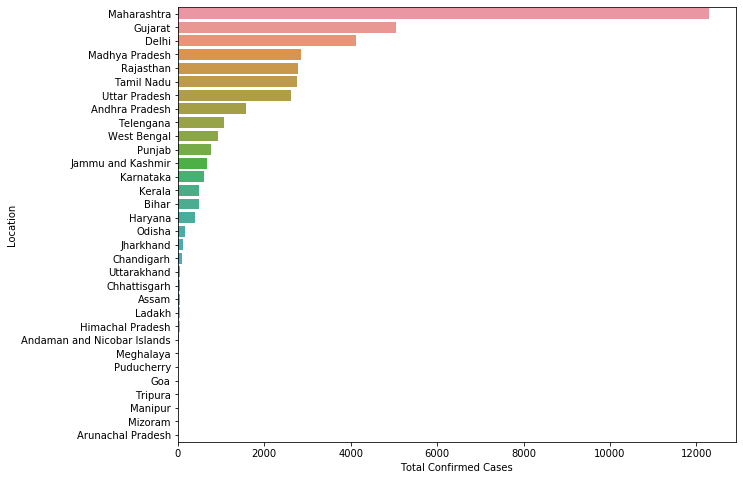

In [18]:
# sorting the  dataframe in the descending order according to the 'Total Confirmed Cases'
df_corona = df_corona.sort_values('Total Confirmed Cases', ascending=False)
sns.barplot(x='Total Confirmed Cases', y='Location', data=df_corona)

## Creating a barplot for the `Locations` and the `Deaths` in each location 

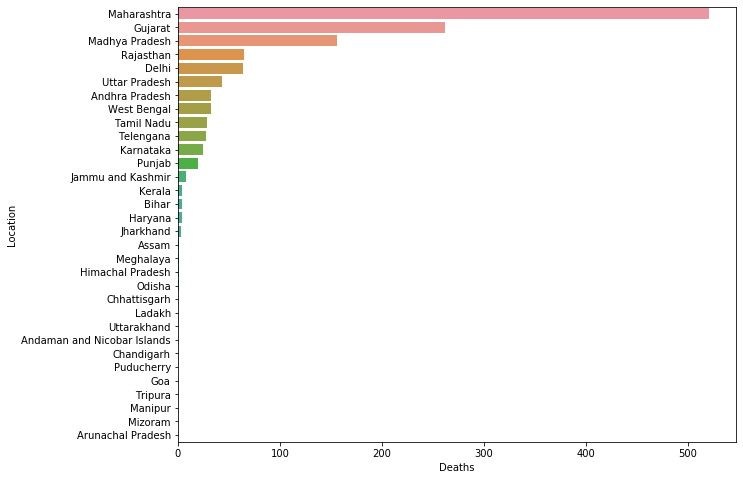

In [19]:
# sorting the  dataframe in the descending order according to the 'Deaths
df_corona = df_corona.sort_values('Deaths', ascending=False)
sns.barplot(x='Deaths', y='Location', data=df_corona)

# Converting the values of 'Total Confirmed Cases' to percentage for better understanding

In [20]:
# finding percentage
df_corona['Total Confirmed Cases (in %)'] = df_corona['Total Confirmed Cases'] / df_corona['Total Confirmed Cases'].sum() *100

In [21]:
# accessing the columns Location and Total Confirmed Cases and then sorting the resultant dataframe in descending order
df_corona[['Location', 'Total Confirmed Cases (in %)']].sort_values('Total Confirmed Cases (in %)', ascending=False)

,Location,Total Confirmed Cases (in %)
18,Maharashtra,30.645000
9,Gujarat,12.598445
7,Delhi,10.273153
17,Madhya Pradesh,7.093012
25,Rajasthan,6.908583
26,Tamil Nadu,6.871199
30,Uttar Pradesh,6.544711
1,Andhra Pradesh,3.945270
27,Telengana,2.649287
31,West Bengal,2.297877


# Write the data to a csv file

In [22]:
timestamp = last_refreshed_date + '_' + last_refreshed_time
timestamp = timestamp.replace(':', '-')
df_corona.to_csv('India_Covid_Cases_{}.csv'.format(timestamp), index=False)